# Projet CENSE

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
#!pip3 uninstall tensorflow-gpu -y
#!pip3 uninstall tensorflow -y
!pip install "tensorflow-gpu<1.14"
!pip3 install openl3
!pip3 install soundfile

     |████████████████████████████████| 345.0MB 51kB/s 
     |████████████████████████████████| 368kB 28.7MB/s 
     |████████████████████████████████| 3.2MB 36.7MB/s 
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.13.1 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 1.13.0 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
     |████████████████████████████████| 337kB 5.2MB/s 
     |████████████████████████████████| 389kB 17.3MB/s 
     |████████████████████████████████| 25.4MB 118kB/s 
     |████████████████████████████████| 3.3MB 29.6MB/s 
     |████████████████████████████████| 26.9MB

#  Import Libraries

In [3]:
import os
import numpy as np 
import matplotlib.pyplot as plt
from glob import glob
import librosa as lr
import openl3
import soundfile as sf
import tensorflow as tf

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

# Preprocessing

In [4]:
#set directory for source files 
data_dir = '/gdrive/My Drive/Colab Notebooks/scenes_stereo/' 
audio_files = glob(data_dir + '*.wav')
print('file size:',len(audio_files))

file size: 100


In [5]:
data_list = glob(data_dir+"/*")
data_audio = []
data_sr = []
data_emb = []
data_ts = []
print('datalist file:',data_list)

all_labels = {'bus','busystreet','office','openairmarket','park','quietstreet','restaurant','supermarket','tube','tubestation'}

for name in ['bus','busystreet','office','openairmarket','park','quietstreet','restaurant','supermarket','tube','tubestation']:
    for k in range(1,10):
      audio, sr = sf.read(data_dir+name + '0'+str(k)+'.wav')
      emb, ts = openl3.get_audio_embedding(audio, sr, content_type="env", input_repr="mel256", embedding_size=512, hop_size=0.022799)
      data_sr.append(sr)
      data_emb.append(emb)
      data_ts.append(ts)

    audio, sr = sf.read(data_dir+name + '10.wav')
    emb, ts = openl3.get_audio_embedding(audio, sr, content_type="env", input_repr="mel256", embedding_size=512, hop_size=0.022799)
    data_sr.append(sr)
    data_emb.append(emb)
    data_ts.append(ts)

datalist file: ['/gdrive/My Drive/Colab Notebooks/scenes_stereo/bus03.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/bus05.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/bus01.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/bus02.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/bus04.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/bus10.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/bus07.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/busystreet02.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/bus09.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/busystreet04.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/bus08.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/busystreet01.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/busystreet03.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/bus06.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/office01.wav', '/gdrive/My Drive/Colab Notebooks/scenes_stereo/offic

In [6]:
data_emb1=[]
for i in range(0,100):
   data_emb1.append(np.transpose(data_emb[i]))

In [7]:
 
#data_sr 
#data_emb 
#data_ts

In [8]:
print (data_emb1[1:100])
import pickle

with open("data_emb.txt", "wb") as fp:   
  pickle.dump(data_emb, fp)

[array([[2.329384 , 2.288163 , 2.322799 , ..., 1.7291424, 1.787431 ,
        1.694017 ],
       [3.5418863, 3.4044094, 3.4236739, ..., 3.1189003, 2.9879744,
        3.1076927],
       [3.2499628, 3.2557127, 3.2608247, ..., 2.7879574, 2.774649 ,
        2.8016176],
       ...,
       [2.7266357, 2.762243 , 2.70942  , ..., 2.5611086, 2.584127 ,
        2.5461755],
       [2.2812407, 2.1673563, 2.1504967, ..., 2.3242505, 2.3337789,
        2.3592722],
       [1.8282691, 1.9446005, 1.8659997, ..., 1.9629256, 2.057061 ,
        2.012308 ]], dtype=float32), array([[2.1365883, 2.085541 , 2.1159296, ..., 2.1009233, 2.1051023,
        2.1039436],
       [2.2423105, 2.4605925, 2.475214 , ..., 2.2742517, 2.4184465,
        2.4761007],
       [3.2558322, 3.2605767, 3.2680655, ..., 2.4945266, 2.471245 ,
        2.486498 ],
       ...,
       [2.8066235, 2.8004496, 2.7837079, ..., 2.9052293, 2.8710988,
        2.8909514],
       [1.6735225, 1.7361592, 1.7183459, ..., 2.0881014, 2.116312 ,
        2.

In [9]:
import numpy as np
#np.reshape('data.npz', data)
np.savez('data_emb.npz', data_emb=data_emb)

In [10]:
data_emb1[0].shape

(512, 1296)

In [11]:
np.mean(data_emb1[0],axis=1).shape

(512,)

In [12]:
labels = [] # Labels des échantillons
for k in range(10):
    labels = labels+[k]*10
dict_labels = {'bus':0,'busystreet':1,'office':2,'openairmarket':3,'park':4,'quietstreet':5,'restaurant':6,'supermarket':7,'tube':8,'tubestation':9} 

# Texture window


In [13]:
def wind_texture(M,wsize):
    
    n,m = M.shape
    nwind = m//wsize
    
    W = np.zeros((n,nwind))
    
    for i in range (nwind):
        W[:,i] = np.mean(M[:,i*wsize:(i+1)*wsize],axis=1)
    
    return(W)

# RbQ-c Approximate

In [14]:
def dist_wind_approximate(A,B,wsize):
    
    x = wind_texture(A,wsize)
    y = wind_texture(B,wsize)
    
    n,m = np.shape(x)
    distxy = np.zeros((m,1))
    
    for k in range(m):
        distxy[k] = np.linalg.norm(x[:,k]-y[:,k])

    return min(distxy)

In [15]:
def p_at_k(mat_dist,K=5,labels=labels):
    p5 = np.zeros(100)
    for k in range(100):
        dist = mat_dist[k,:]
        distsort = np.argsort(np.ravel(dist))

        p5[k] = np.sum([labels[distsort[i]]==labels[k] for i in range(1,K+1)])/K
    return(np.mean(p5))

In [16]:
seq_size = [21, 43, 86, 172, 344] #  0.5s 1s 2s 4s 8s
mat_dist = np.zeros((len(seq_size), 100,100))
precision = np.zeros((len(seq_size),9))
num = 0


for n, windsize in enumerate(seq_size):
    for i in range(100):
        for j in range(i,100):
            mat_dist[n, i,j] = dist_wind_approximate(data_emb1[i],data_emb1[j],windsize)
            mat_dist[n, j,i] = mat_dist[n, i,j]

    for k in range(1,10):
        precision[n,k-1] = p_at_k(mat_dist[n, :, :],k)

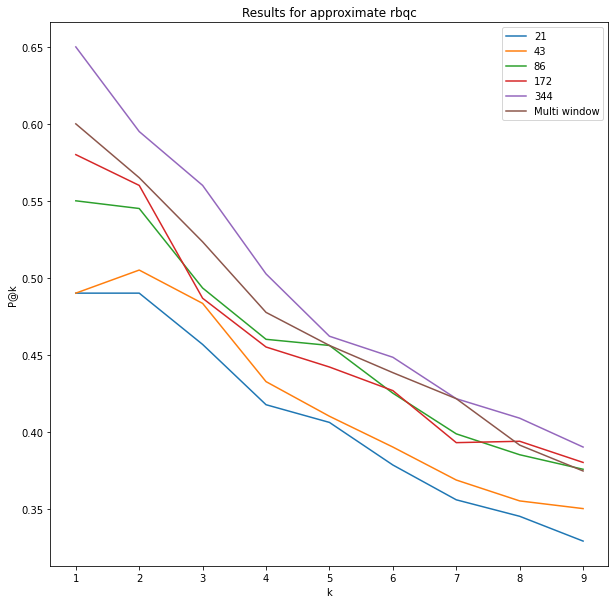

In [17]:
precisionMult = np.zeros(9)
for k in range(1,10):
    precisionMult[k-1] = p_at_k(mat_dist.sum(axis=0),k)

plt.figure(figsize=(10,10))    
for i in range(len(seq_size)):
    plt.plot(range(1,10),precision[i,:],label=seq_size[i])
plt.plot(range(1,10),precisionMult,label = 'Multi window')
plt.title('Results for approximate rbqc')
plt.xlabel('k')
plt.ylabel('P@k')
plt.legend()
plt.show()

In [18]:
for i in range(len(seq_size)):
  print("for window size = ", seq_size[i] )
  for j in range(1,10):
    if (j==(4)):
       print("k=  ", j,  precision[i,j])
print("For multi ")
print("k= 5 ",  precisionMult[4])


for window size =  21
k=   4 0.40600000000000014
for window size =  43
k=   4 0.41000000000000014
for window size =  86
k=   4 0.4560000000000002
for window size =  172
k=   4 0.4420000000000001
for window size =  344
k=   4 0.462
For multi 
k= 5  0.45600000000000007


# RbQ-c Complete

In [19]:
def dist_wind(A,B,wsize):
    
    x = wind_texture(A,wsize)
    y = wind_texture(B,wsize)
    
    n,m = np.shape(x)
    distxy = np.float('Inf')
    
    for k in range(m):
        distxy = min(distxy, min(np.linalg.norm(np.transpose(y)-x[:,k], axis=1)))

    return distxy

In [20]:
seq_size = [21, 43, 86, 172, 344] #  0.5s 1s 2s 4s 8s
mat_dist = np.zeros((len(seq_size), 100,100))
precision = np.zeros((len(seq_size),9))
num = 0

for n, windsize in enumerate(seq_size):
    for i in range(100):
        for j in range(i,100):
            mat_dist[n, i,j] = dist_wind(data_emb1[i],data_emb1[j],windsize)
            mat_dist[n, j,i] = mat_dist[n, i,j]

    for k in range(1,10):
        precision[n,k-1] = p_at_k(mat_dist[n, :, :],k)

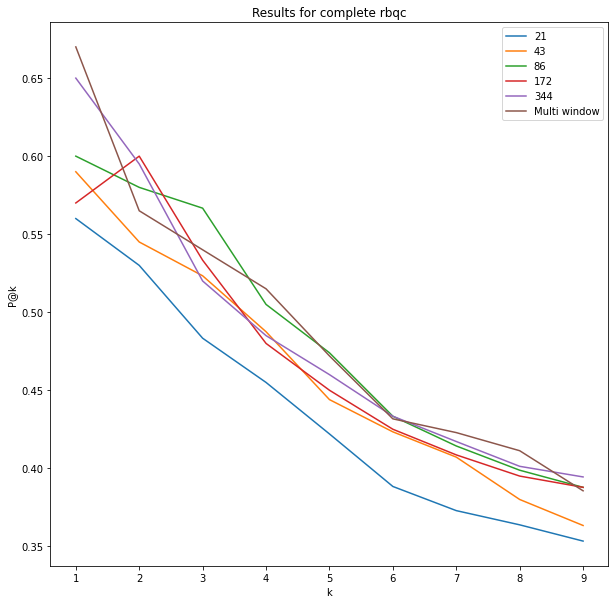

In [21]:
precisionMult = np.zeros(9)
for k in range(1,10):
    precisionMult[k-1] = p_at_k(mat_dist.sum(axis=0),k)

plt.figure(figsize=(10,10))    
for i in range(len(seq_size)):
    plt.plot(range(1,10),precision[i,:],label=seq_size[i])
plt.plot(range(1,10),precisionMult,label = 'Multi window')
plt.title('Results for complete rbqc')
plt.xlabel('k')
plt.ylabel('P@k')
plt.legend()
plt.show()

In [22]:
for i in range(len(seq_size)):
  print("for window size = ", seq_size[i] )
  for j in range(1,10):
    if (j==(4)):
       print("k=  ", j,  precision[i,j])
print("For multi ")
print("k= 5 ",  precisionMult[4])


for window size =  21
k=   4 0.4220000000000001
for window size =  43
k=   4 0.4440000000000001
for window size =  86
k=   4 0.47400000000000014
for window size =  172
k=   4 0.45000000000000007
for window size =  344
k=   4 0.4600000000000001
For multi 
k= 5  0.4720000000000001


# Early integration

In [23]:
seq_size = [21, 43, 86, 172, 344] #  0.5s 1s 2s 4s 8s
mat_dist = np.zeros((len(seq_size), 100,100))
precisionEarly = np.zeros(9)
num=0
for i in range(100):
    for j in range(i,100):
      mat_dist[n, i,j] = np.linalg.norm(np.sum(data_emb1[i], axis=1) - np.sum(data_emb1[j], axis=1))

      mat_dist[n, j,i] = mat_dist[n, i,j]

for k in range(1,10):
        precisionEarly[k-1] = p_at_k(mat_dist.sum(axis=0),k)

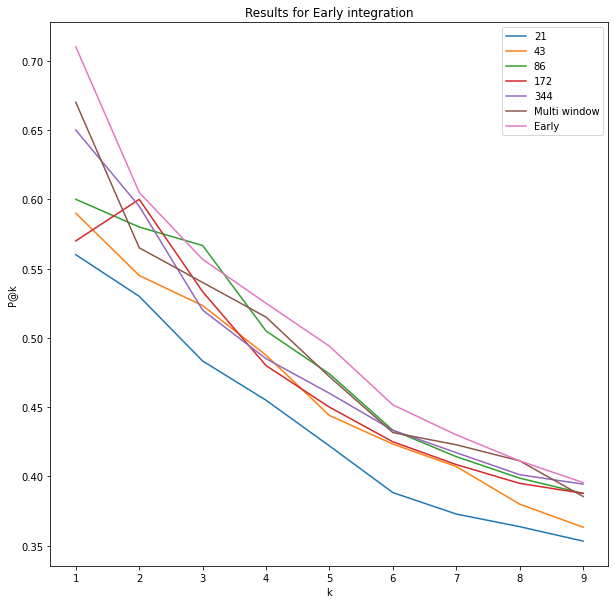

In [24]:
plt.figure(figsize=(10,10))    
for i in range(len(seq_size)):
    plt.plot(range(1,10),precision[i,:],label=seq_size[i])
plt.plot(range(1,10),precisionMult,label = 'Multi window')
plt.plot(range(1,10),precisionEarly,label = 'Early')
plt.title('Results for Early integration')
plt.xlabel('k')
plt.ylabel('P@k')
plt.legend()
plt.show()

In [25]:
for i in range(len(seq_size)):
  print("for window size = ", seq_size[i] )
  for j in range(1,10):
    if (j==(4)):
       print("k=  ", j,  precision[i,j])
print("For multi ")
print("k= 5 ",  precisionMult[4])
print("For early ")
print("k= 5 ",  precisionEarly[4])

for window size =  21
k=   4 0.4220000000000001
for window size =  43
k=   4 0.4440000000000001
for window size =  86
k=   4 0.47400000000000014
for window size =  172
k=   4 0.45000000000000007
for window size =  344
k=   4 0.4600000000000001
For multi 
k= 5  0.4720000000000001
For early 
k= 5  0.49400000000000005
